## Run k-means on AT&T face imagesdataset, set K=40. 
1. Return the clustering result and compute the k-means loss. 
2. Obtain confusion matrixand compute accuracy. 
3. Re-order the confusion matrix using bipartite graph matchingand computeaccuracy.

In [218]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import completeness_score, confusion_matrix
import matplotlib.pyplot as plt
import networkx as nx


pd.options.display.max_columns = None
pd.options.display.max_rows = None
np.set_printoptions(threshold=np.inf)

dataset = pd.read_csv("./data/ATNTFaceImages.txt", header=None)
print("raw data: \n", dataset.head(), dataset.shape)
label = dataset[:1]
# Drop labels
dataset = dataset.drop([0]).T
print("Processed data: \n", dataset.head(), dataset.shape)
print('Labels\n', label)
kmeans = KMeans(n_clusters=40, random_state=0)
pred_y = np.add(kmeans.fit_predict(dataset), 1)

print(dataset.shape)

raw data: 
    0    1    2    3    4    5    6    7    8    9    10   11   12   13   14   \
0    1    1    1    1    1    1    1    1    1    1    2    2    2    2    2   
1   47   64   50   39   66   51   46   37   43   33   37   37   35   36   34   
2   47   65   58   30   39   48   47   35   42   34   37   38   37   37   36   
3   49   69   55   28   56   64   50   30   41   28   37   39   37   38   36   
4   51   78   52   46   56   74   50   28   38   32   38   39   38   38   37   

   15   16   17   18   19   20   21   22   23   24   25   26   27   28   29   \
0    2    2    2    2    2    3    3    3    3    3    3    3    3    3    3   
1   37   38   37   39   36  104  102  103  103  102  108  109  107  106  106   
2   38   38   38   40   38  104  103  103  103  101  108  110  108  106  107   
3   39   39   39   40   39  105  103  104  104  103  110  110  108  107  109   
4   40   39   39   41   40   96  101   99  104   97  101  111  101  104   92   

   30   31   32   33   34 

### Return the clustering result and compute the k-means loss. 
1. pred_y: Compute cluster centers and predict cluster index for each sample.
2. inertia_: Sum of squared distances of samples to their closest cluster center.

In [219]:
print("The clustering results are: \n", pred_y)
print("The k-means losses are: \n", kmeans.inertia_)

The clustering results are: 
 [18  9 18 22 22  9 22 22 22 22  8  8  8  8  8  8  8  8  8  8 38 38 38 38
 33 38 38 38 38 38 10 10 10 10 10 10 10 10 10 10 33 33 33 33  9  9 33  9
  9  9 17 17 17 17 17 17 17 17 17 17 25 25 25 25 25 25 25 25 25 25 28 28
 28 28 28 28 28 28 28 28 29 29 29 29 29 29 29 29 29 29 32 32 32 32 32 32
 32 32 32 28 36 36 36 23 23 36 36 26 36 36  1  1  1  1  1  1  1  1  1  1
  7  7  7  7  7  7  7  7  7  7 11 11 11 11 11 23 23 23 23 23 26  5 26 26
  5 26  5 26  5  5 18 18 18 22 22 26 18 18 18 18  6  6 12 12  6 35 35 35
 35 35 40 40  9 40 40  9 40  9 40  9 39 39 39 39 39 39 39 39 26 39 15 15
 15 15  3 15  3  3  3 15 16 16 16 16 16 16 16 16 16 16  2  2  2  2  2  2
  2  2  2  2 12  3 31 31 31 31 31  3 31 12 21 21 21 21 21 21 21 21 21 21
 10 10 10 33 33 10 10 33 10 10 14 14 14 14 14 14 14 14 14 14  4  4  4  4
  4  4 36  4  4  4 30 27 30 39 27 30 27 30  6 30 19 19 19 19 19 19 19 31
 19 19 20 20 20 20 20 20 20 20 20 20 16 24 24 24 24 16 16 16 16 24 37 37
 37 37 37 37  8 37 37

In [220]:
# Confusion matrix
df = pd.DataFrame({'Labels': label.squeeze(), 'Clusters': pred_y})
# ct = confusion_matrix(df['Clusters'], df['Labels'])
ct = pd.crosstab(df['Clusters'], df['Labels'])
print("The confusion matrix is: \n", ct)
# Accuracy score of confusion matrix
print('The accuracy of confusion matrix is \n', sum(np.diag(ct))/dataset.shape[0])

The confusion matrix is: 
 Labels    1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  \
Clusters                                                                       
1          0   0   0   0   0   0   0   0   0   0   0  10   0   0   0   0   0   
2          0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3          0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
4          0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
5          0   0   0   0   0   0   0   0   0   0   0   0   0   0   5   0   0   
6          0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   3   
7          0   0   0   0   0   0   0   0   0   0   0   0  10   0   0   0   0   
8          0  10   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
9          2   0   0   0   5   0   0   0   0   0   0   0   0   0   0   0   0   
10         0   0   0  10   0   0   0   0   0   0   0   0   0   0   0   0   0   
11         0 

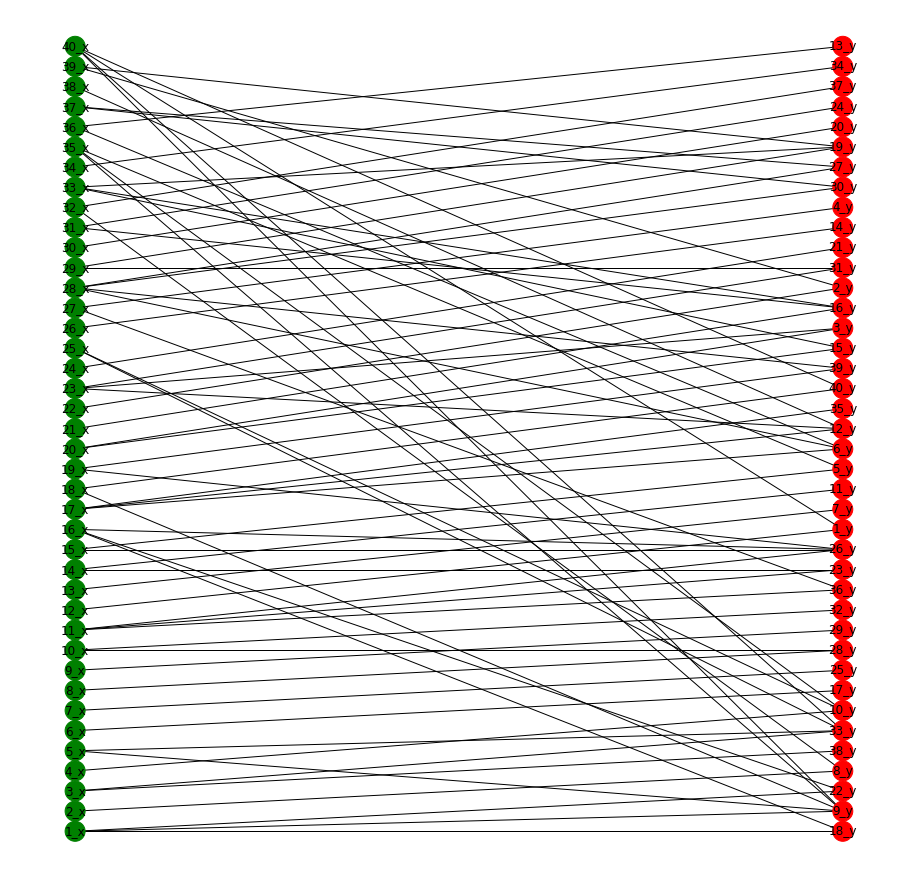

In [221]:
B = nx.Graph()
labels = [str(df['Labels'][i])+'_x' for i in range(len(df['Labels']))]
preds = [str(df['Clusters'][i])+'_y' for i in range(len(df['Clusters']))]


B.add_nodes_from(labels, bipartite=0)
B.add_nodes_from(preds, bipartite=1)
edges = [(x, y) for x, y in zip(labels, preds)] 
B.add_edges_from(edges)
color_map = []
for node in B:
    if 'x' in node:
        color_map.append('green')
    else:
        color_map.append('red')

# Separate by group
l = [node for node in B.nodes() if B.node[node]['bipartite']==0]
r = [node for node in B.nodes() if B.node[node]['bipartite']==1]
pos = {}

# Update position for node from each group
pos.update((node, (1, index)) for index, node in enumerate(l))
pos.update((node, (2, index)) for index, node in enumerate(r))

plt.figure(3,figsize=(12,12)) 
nx.draw(B, with_labels=True, node_color=color_map, node_size=400, pos=pos)
plt.show()

In [222]:
matching = list(nx.max_weight_matching(B))
print('The results of maximum partite matching is:\n', matching)
matching_list = [0] * 40
for m in list(matching):
    m0 = int(m[0].split('_')[0]) if m[0].split('_')[1]=='x' else int(m[1].split('_')[0])
    m1 = int(m[1].split('_')[0]) if m[1].split('_')[1]=='y' else int(m[0].split('_')[0])
    matching_list[m0-1] = m1
print("The permute index of confusion matrix is:\n", matching_list)
matching_list[38] = 3
matching_list[24] = 6
print('The complete matching list is:', matching_list)

The results of maximum partite matching is:
 [('37_x', '30_y'), ('12_y', '38_x'), ('24_x', '21_y'), ('2_y', '22_x'), ('40_y', '18_x'), ('20_y', '30_x'), ('23_x', '31_y'), ('28_x', '27_y'), ('24_y', '31_x'), ('14_y', '26_x'), ('25_y', '7_x'), ('16_y', '21_x'), ('15_y', '33_x'), ('9_y', '40_x'), ('35_x', '5_y'), ('18_y', '16_x'), ('17_y', '6_x'), ('8_x', '28_y'), ('23_y', '11_x'), ('37_y', '32_x'), ('13_y', '36_x'), ('3_x', '38_y'), ('19_x', '39_y'), ('35_y', '17_x'), ('10_y', '4_x'), ('12_x', '1_y'), ('27_x', '4_y'), ('29_x', '19_y'), ('1_x', '22_y'), ('34_x', '34_y'), ('7_y', '13_x'), ('5_x', '33_y'), ('32_y', '10_x'), ('14_x', '11_y'), ('26_y', '15_x'), ('3_y', '20_x'), ('2_x', '8_y'), ('9_x', '29_y')]
The permute index of confusion matrix is:
 [22, 8, 38, 10, 33, 17, 25, 28, 29, 32, 23, 1, 7, 11, 26, 18, 35, 40, 39, 3, 16, 2, 31, 21, 0, 14, 4, 27, 19, 20, 24, 37, 15, 34, 5, 13, 30, 12, 0, 9]
The complete matching list is: [22, 8, 38, 10, 33, 17, 25, 28, 29, 32, 23, 1, 7, 11, 26, 18, 

In [223]:
permuted_ct = ct[matching_list]
print('Permuted new confusion matrix is:\n', permuted_ct)
print('The accuracy of confusion matrix is \n', sum(np.diag(permuted_ct))/dataset.shape[0])

Permuted new confusion matrix is:
Labels    22  8   38  10  33  17  25  28  29  32  23  1   7   11  26  18  35  \
Clusters                                                                       
1          0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2         10   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3          0   0   0   0   0   0   0   0   0   0   2   0   0   0   0   0   0   
4          0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
5          0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   4   
6          0   0   0   0   0   3   0   1   0   0   0   0   0   0   0   0   0   
7          0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
8          0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   
9          0   0   0   0   0   0   0   0   0   0   0   2   0   0   0   4   3   
10         0   0   0   0   0   0   7   0   0   0   0   0   0   0   0   0   3   
11    